In [1]:
#PROJECT 3 - UNSUPERVISED LEARNING

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn


In [3]:
#STEP 1: LOAD YOUR DATA INCLUDING TESTING/TRAINING SPLIT FROM PROJECT 1

In [4]:
wine = pd.read_csv('wine.csv')
wine["class"] = wine["class"].astype("category")
print(wine.dtypes)



class                        category
alcohol                       float64
malic_acid                    float64
ash                           float64
alcalinity_ash                float64
magnesium                       int64
total_phenols                 float64
flavanoids                    float64
nonflavanoid_phenols          float64
proanthocyanins               float64
color_intensity               float64
hue                           float64
OD280_OD315_diluted_wines     float64
proline                         int64
dtype: object


In [5]:
#SETTING X AND Y
y = wine[['class']]
print(y)
X = wine.drop(['class'], axis=1)
print(X)

    class
0       1
1       1
2       1
3       1
4       1
..    ...
173     3
174     3
175     3
176     3
177     3

[178 rows x 1 columns]
     alcohol  malic_acid   ash  alcalinity_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43            15.6        127           2.80   
1      13.20        1.78  2.14            11.2        100           2.65   
2      13.16        2.36  2.67            18.6        101           2.80   
3      14.37        1.95  2.50            16.8        113           3.85   
4      13.24        2.59  2.87            21.0        118           2.80   
..       ...         ...   ...             ...        ...            ...   
173    13.71        5.65  2.45            20.5         95           1.68   
174    13.40        3.91  2.48            23.0        102           1.80   
175    13.27        4.28  2.26            20.0        120           1.59   
176    13.17        2.59  2.37            20.0        120           1.65   
177    14.13        

In [6]:
#RUNNING TRAIN_TEST_SPLIT FUNCTION, STRATIFY=Y TO MAKE SURE PROPORTIONS ARE BALANCED BETWEEN TEST AND TRAINING SETS 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.2)

In [7]:
#MAKING SURE THE TRAINING SET IS BALANCED 
y_train["class"].value_counts()

2    57
1    47
3    38
Name: class, dtype: int64

In [8]:
y_test["class"].value_counts()


2    14
1    12
3    10
Name: class, dtype: int64

In [9]:
# CHECKING FOR INITIAL MISSING VALUES AND NON-NULL VALUES USING THE .INFO() - NO MISSING VALUES WERE FOUND.
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 84 to 106
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   alcohol                    142 non-null    float64
 1   malic_acid                 142 non-null    float64
 2   ash                        142 non-null    float64
 3   alcalinity_ash             142 non-null    float64
 4   magnesium                  142 non-null    int64  
 5   total_phenols              142 non-null    float64
 6   flavanoids                 142 non-null    float64
 7   nonflavanoid_phenols       142 non-null    float64
 8   proanthocyanins            142 non-null    float64
 9   color_intensity            142 non-null    float64
 10  hue                        142 non-null    float64
 11  OD280_OD315_diluted_wines  142 non-null    float64
 12  proline                    142 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 15.5 KB


In [10]:
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 84 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   class   142 non-null    category
dtypes: category(1)
memory usage: 1.4 KB


In [11]:
#CHECKING FOR OUTLIERS - DECISION TO KEEP ALL DATA. NO EXTREME OUTLIERS DETECTED.
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,13.022113,2.335775,2.377676,19.678873,99.014085,2.295563,2.029296,0.365563,1.598521,5.015282,0.953070,2.613592,750.915493
std,0.817665,1.133637,0.273249,3.428848,13.570925,0.616401,1.009388,0.120904,0.583920,2.334386,0.218457,0.702003,325.251163
min,11.410000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.370000,1.615000,2.232500,17.500000,88.250000,1.750000,1.227500,0.270000,1.250000,3.180000,0.790000,1.972500,496.250000
50%,13.060000,1.865000,2.360000,19.550000,97.500000,2.380000,2.135000,0.340000,1.555000,4.640000,0.960000,2.795000,673.500000
75%,13.677500,2.982500,2.580000,21.575000,106.000000,2.800000,2.842500,0.430000,1.957500,6.000000,1.120000,3.170000,1031.250000
max,14.830000,5.800000,3.230000,30.000000,151.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.420000,4.000000,1680.000000


In [12]:
#STEP 2: PRINCIPAL COMPONENT ANALYSIS (PCA) FOR FEATURE SELECTION
# DIMENSION REDUCTION FINDS THE PATTERN IN THE DATA AND USES THESE TO RE-FORMAT IT IN A COMPRESSED WAY. IT MAKES THE SUBSEQUENT CALCULATIONS MORE EFFICIENT AND IS USED WITH BIG DATA SETS. IT WORKS TO DISCARD NOISY FEATURES THAT CAN CREATE OBSTACLES FOR LEARNING TASKS.

In [13]:
#scale data to have the same variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
#keep the first two principal components of the data
pca2 = PCA(n_components=2)
#fit PCA model to data
pca2.fit(X_scaled)
#transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

In [15]:
from sklearn.decomposition import PCA 
# keep all the principal components of data
pca_ALL = PCA()

# fit PCA model to the scaled data
pca_ALL.fit(X_scaled)

# the explained variance ratio tells us for each of the principal components how much of the variance has been exploited. We want to explain 95% of the variance for the dimensionality reduction.
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca_ALL.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.35950519 0.18547258 0.1207213  0.07363622 0.06481966 0.05159272
 0.04005639 0.02773963 0.02293    0.01716527 0.01481006 0.01292851
 0.00862246]


In [16]:
# seeing how many components are needed to capture 95% of the variance
pca95 = PCA(n_components=0.95)
# fit PCA model to data
pca95.fit(X_scaled)

#transform data onto the 95% 
X_pca95_train = pca95.transform(X_scaled)
X_pca95_test = pca95.transform(X_scaled_test)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca95.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.35950519 0.18547258 0.1207213  0.07363622 0.06481966 0.05159272
 0.04005639 0.02773963 0.02293    0.01716527]


In [17]:
#APPLYING THE PCA TO THE MODEL VS. THE ORIGINAL

In [18]:
#Evaluate whether this improves your best-performing model from Project 2
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_pca95_train, y_train) #Putting the PCA for 95% variance into the model
print("Accuracy on training set: {:.2f}".format(model.score(X_pca95_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_pca95_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [53]:
#  FROM PROJECT 2: best performing model - accuracy of n_estimators=23, max_depth=32 on training data
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=23, max_depth=32, random_state=0)
model.fit(X_train, y_train)
print("Accuracy on training set: {}".format(model.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.33


In [ ]:
#FINDING - FOR THE TRAINING DATA THE ACCURACY IS THE SAME (1.0) with PCA and without. The accuracy is much higher on the test with PCA than without (1.0 vs. 0.33)

In [20]:
#STEP 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.

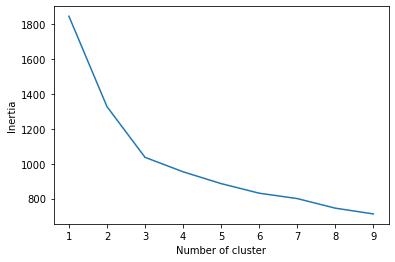

In [21]:
#k-Means (use an elbow visualization to determine the optimal numbers of clusters)
#without PCA
from sklearn.cluster import KMeans

X_train = X_scaled
y_train = y_train
inertiaVals = {}
for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 9 - Color intensity')

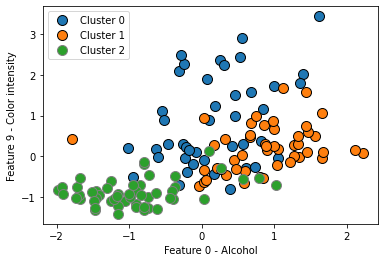

In [22]:
#RUNNING K MEANS ON OPTIMAL 3 CLUSTERS ACCORDING TO ELBOW PLOT
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 9], kmeans2.labels_, markers='o')
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0 - Alcohol")
plt.ylabel("Feature 9 - Color intensity")

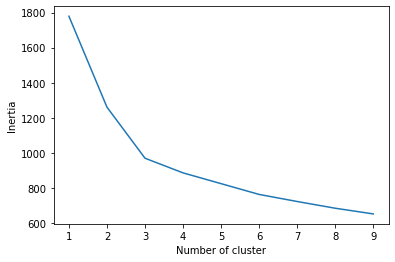

In [23]:
#With PCA 
inertiaVals = {}
for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_pca95_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 9 - Color intensity')

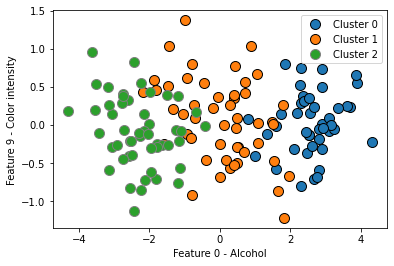

In [24]:
#RUNNING ON PCA OPTIMAL CLUSTERS ACCORDING TO PLOT N=3
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca95_train)

mglearn.discrete_scatter(X_pca95_train[:, 0], X_pca95_train[:, 9], kmeans_pca.labels_, markers='o')
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0 - Alcohol")
plt.ylabel("Feature 9 - Color intensity")

In [25]:
#AGGLOMERATE / HIERARCHICAL

In [26]:
#Without PCA 

Text(0, 0.5, 'Feature 1')

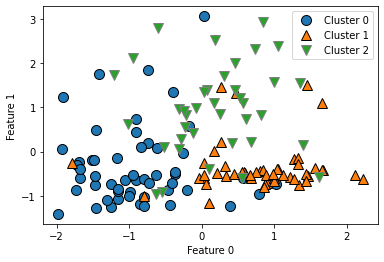

In [27]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

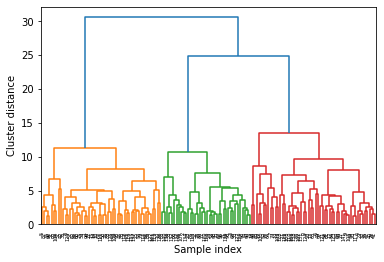

In [28]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [29]:
#With PCA 

Text(0, 0.5, 'Feature 1')

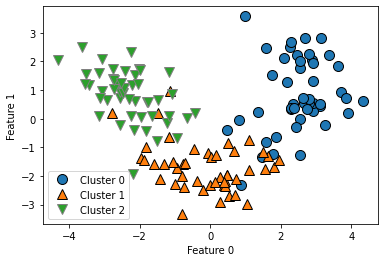

In [30]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_pca95_train)

mglearn.discrete_scatter(X_pca95_train[:, 0], X_pca95_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

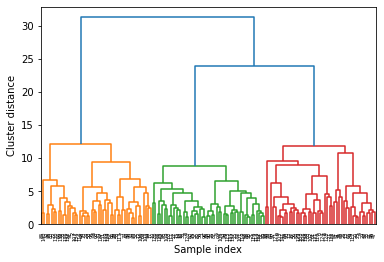

In [31]:
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_pca95_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [32]:
#DBSCAN

In [33]:
#Without PCA

Text(0, 0.5, 'Feature 1')

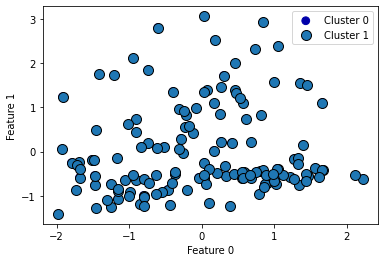

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3,eps=1.0) # PLAY AROUND WITH THIS TO CHANGE CLUSTERS
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

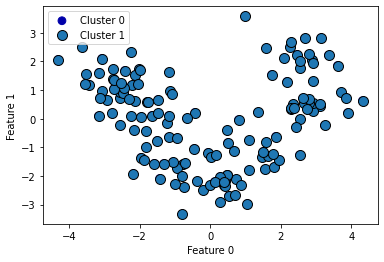

In [35]:
#WITH PCA 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3,eps=1.0) # PLAY AROUND WITH THIS TO CHANGE CLUSTERS
clusters = dbscan.fit_predict(X_pca95_train)

# plot the cluster assignments
plt.scatter(X_pca95_train[:, 0], X_pca95_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_pca95_train[:, 0], X_pca95_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [36]:
#calculating ARI scores and Silhouette scores

In [ ]:
#ARI SCORES 

ValueError: labels_true must be 1D: shape is (142, 1)

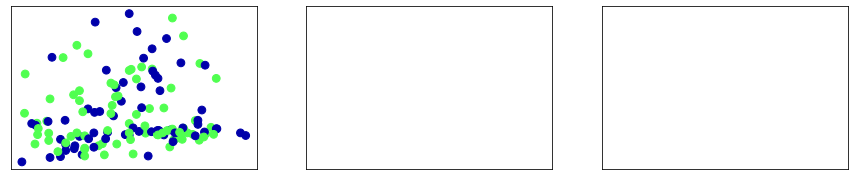

In [44]:
from sklearn.metrics.cluster import adjusted_rand_score

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_scaled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))
    
for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

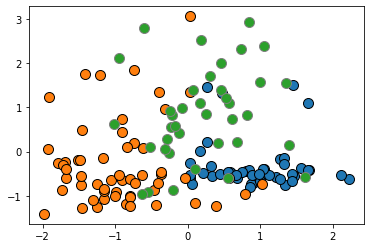

In [38]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(X_train, y_train)
vals=model.predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], vals, markers='o')

In [ ]:
#SILHOUETTE SCORES

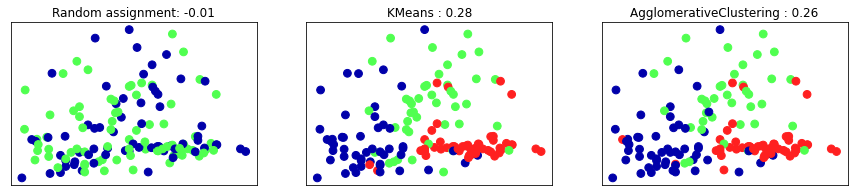

In [42]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))